In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('filtered_train.csv')
df.head()
df.shape

(56652, 4)

In [1]:
import pandas as pd

# Step 1: Load the CSV file
csv_file_path = 'filtered_train.csv'  # Update with your CSV file path
df = pd.read_csv(csv_file_path)

# Step 2: Specify the column name for group IDs
group_id_column = 'group_id'  # Update with the actual column name for group IDs

# Step 3: Split the DataFrame into sub-datasets based on group_id
grouped_dfs = {group_id: group for group_id, group in df.groupby(group_id_column)}

# Step 4: Optionally, save each sub-dataset to a separate CSV file
for group_id, group_df in grouped_dfs.items():
    output_file_path = f'D:\minorImage\data\group_{group_id}.csv'  # Define the output file name
    group_df.to_csv(output_file_path, index=False)  # Save the sub-dataset to a CSV file
    print(f'Saved sub-dataset for group_id {group_id} to {output_file_path}')


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ANMOL CHADHA\AppData\Local\Temp\ipykernel_23264\244414033.py:15: SyntaxWarning: invalid escape sequence '\m'
  output_file_path = f'D:\minorImage\data\group_{group_id}.csv'  # Define the output file name


Saved sub-dataset for group_id 281678 to D:\minorImage\data\group_281678.csv
Saved sub-dataset for group_id 299791 to D:\minorImage\data\group_299791.csv
Saved sub-dataset for group_id 308856 to D:\minorImage\data\group_308856.csv
Saved sub-dataset for group_id 459516 to D:\minorImage\data\group_459516.csv
Saved sub-dataset for group_id 483370 to D:\minorImage\data\group_483370.csv
Saved sub-dataset for group_id 630869 to D:\minorImage\data\group_630869.csv
Saved sub-dataset for group_id 675317 to D:\minorImage\data\group_675317.csv
Saved sub-dataset for group_id 731432 to D:\minorImage\data\group_731432.csv
Saved sub-dataset for group_id 752266 to D:\minorImage\data\group_752266.csv
Saved sub-dataset for group_id 993359 to D:\minorImage\data\group_993359.csv


In [204]:
groupName = 'group_752266'

In [ ]:
nextGroupidPath = fr'\dataCSV\{groupName}.csv'

In [206]:
df=pd.read_csv(nextGroupidPath)
df.head(10)

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/41VK2Lg8Sw...,752266,width,27.0 centimetre
1,https://m.media-amazon.com/images/I/71IULZfmxE...,752266,wattage,60.0 watt
2,https://m.media-amazon.com/images/I/512Oo0Hje6...,752266,width,350.0 millimetre
3,https://m.media-amazon.com/images/I/71tU9FoMpU...,752266,voltage,"[110.0, 240.0] volt"
4,https://m.media-amazon.com/images/I/51hSgBbBLT...,752266,height,430.0 millimetre
5,https://m.media-amazon.com/images/I/611wOJg2uR...,752266,voltage,5.5 volt
6,https://m.media-amazon.com/images/I/71yE0-qXZ3...,752266,wattage,5.0 watt
7,https://m.media-amazon.com/images/I/51oHGtZpoT...,752266,width,14.0 centimetre
8,https://m.media-amazon.com/images/I/61F+vbhhZB...,752266,voltage,"[110.0, 265.0] volt"
9,https://m.media-amazon.com/images/I/617CPcH56V...,752266,width,63.0 centimetre


In [207]:
df.shape

(9063, 4)

In [208]:
import pandas as pd
import numpy as np
import requests
from PIL import Image
from io import BytesIO

# Step 1: Load the CSV file
df = pd.read_csv(nextGroupidPath)

# Step 2: Define the column names
image_column = 'image_link'  # Column with image URLs
entity_column = 'entity_name'  # Column with entity names

# Step 3: Initialize lists to store entity names and image pixels
entity_names = []
image_pixels = []
count = 0

# Step 4: Fetch images, convert to grayscale, and extract pixel values
for index, row in df.iterrows():
    image_url = row[image_column]
    entity_name = row[entity_column]
    
    try:
        # Fetch the image
        response = requests.get(image_url)
        response.raise_for_status()

        # Open and convert the image to grayscale
        image = Image.open(BytesIO(response.content)).convert('L')

        # Convert the image to a numpy array (flatten the array if needed)
        image_array = np.array(image)

        # Append the entity name and image pixel data
        entity_names.append(entity_name)
        image_pixels.append(image_array)
        count += 1
        print(count)
        if count >= 500:
            break
        
    except Exception as e:
        print(f"Failed to process {image_url}: {e}")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [209]:
import numpy as np
from PIL import Image

# Define a fixed size for all images (e.g., 128x128)
image_size = (512, 512)

# Initialize a list for resized images
uniform_image_pixels = []

# Resize each 2D image array to the fixed size
for image_array in image_pixels:
    try:
        # Convert the 2D numpy array to a PIL image
        image = Image.fromarray(image_array)

        # Resize the image to the fixed size
        resized_image = image.resize(image_size)

        # Convert the resized image back to a numpy array
        resized_array = np.array(resized_image)

        # Add the resized array to the list
        uniform_image_pixels.append(resized_array)

    except Exception as e:
        print(f"Error processing image: {e}")

# Convert the lists to numpy arrays
entity_names_array = np.array(entity_names)
image_pixels_array = np.array(uniform_image_pixels)

# Check the shapes to ensure consistency
print(f"Entity Names Shape: {entity_names_array.shape}")
print(f"Image Pixels Shape: {image_pixels_array.shape}")

# Save the data to an npz file
output_data = {
    'entityNames': entity_names_array,
    'imagePixels': image_pixels_array
}

Entity Names Shape: (500,)
Image Pixels Shape: (500, 512, 512)


In [210]:
output_data['imagePixels'][0].shape

(512, 512)

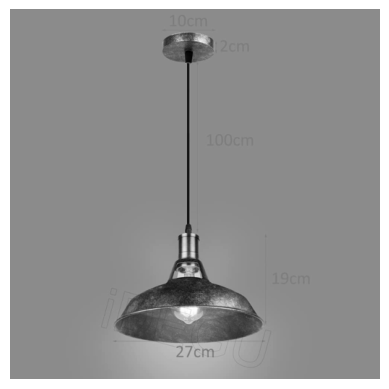

In [212]:
import matplotlib.pyplot as plt
r = output_data['imagePixels'][0]
plt.imshow(r, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

In [213]:
print("Keys in the NPZ file:")
print(output_data['imagePixels'][0].shape)

Keys in the NPZ file:
(512, 512)


**Created Encoding**

In [189]:
# Convert entity names (labels) from strings to integers using LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import tensorflow as tf

# Assuming entity_names contains your entity values
entity_names = ['item_volume', 'item_weight', 'depth', 'height', 'width', 'wattage', 'voltage']

# Reshape the data to be a 2D array
entity_names = np.array(entity_names).reshape(-1, 1)

# Initialize the OneHotEncoder with sparse=False to get dense arrays
encoder = OneHotEncoder(sparse_output =False)

# Fit the encoder on the original values
encoder.fit(entity_names)

# Get the one-hot encoding for the original values
y_oneHot = encoder.transform(entity_names)

In [ ]:
import numpy as np
import tensorflow as tf

X = output_data['imagePixels']
y = output_data['entityNames']


yReshaped = y.reshape(-1, 1)

y = encoder.transform(yReshaped)

print("Shape of X_train after resizing and RGB conversion:", X.shape)
print("Shape of y_train (one-hot encoded):", y.shape)

# Save the new data into a new .npz file
np.savez(fr'\dataNPZ\{groupName}.npz', pixel_arrays=X, entity_names=y)

# Verify by loading the newly saved .npz file
new_data = np.load(fr'\dataNPZ\{groupName}.npz')
print("Keys in the new NPZ file:", new_data.keys())
print("Shape of X_train in new NPZ:", new_data['pixel_arrays'].shape)
print("Shape of y_train in new NPZ:", new_data['entity_names'].shape)


Shape of X_train after resizing and RGB conversion: (500, 512, 512)
Shape of y_train (one-hot encoded): (500, 7)
Keys in the new NPZ file: KeysView(NpzFile 'D:\\minorImage\\dataNPZ\\group_752266.npz' with keys: pixel_arrays, entity_names)
Shape of X_train in new NPZ: (500, 512, 512)
Shape of y_train in new NPZ: (500, 7)


In [190]:
y_oneHot

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [186]:
yOneHotBackup = y_oneHot

In [ ]:
data = np.load(r'\dataNPZ\group_752266.npz')
print("Keys in the new NPZ file:", data.keys())

Keys in the new NPZ file: KeysView(NpzFile 'D:\\minorImage\\dataNPZ\\group_752266.npz' with keys: pixel_arrays, entity_names)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=99cf3d97-eaa6-4840-b872-e11945a5dee2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>